In [8]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime
import os
import time
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [1]:
pwd

'D:\\Programming\\YouTube\\DL_forecasting'

In [10]:
start = datetime(2010,1,1)
end = datetime(2020,1,1)
reliance = web.DataReader('RELIANCE.NS','yahoo',start,end)

In [11]:
rdf = reliance[['Adj Close']]

In [13]:
rdf.columns = ['Close']

In [16]:
rdf['target'] = rdf['Close'].shift(-1)

<ipython-input-16-8fd6dffafac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['target'] = rdf['Close'].shift(-1)


In [18]:
rdf.dropna(inplace=True)

<ipython-input-18-6fea112cdd9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True


In [52]:
rdf

,Close,target
Date,,
2010-01-04,485.824005,483.655701
2010-01-05,483.655701,491.470398
2010-01-06,491.470398,499.623901
2010-01-07,499.623901,498.313904
2010-01-08,498.313904,488.534241
...,...,...
2019-12-24,1526.198242,1495.554810
2019-12-26,1495.554810,1522.151855
2019-12-27,1522.151855,1523.977661


In [53]:
rdf.reset_index(inplace=True)

In [56]:
rdf = rdf[['Close','target']]

In [58]:
rdf = rdf.values

In [61]:
train, test = rdf[:int(len(rdf)*0.8)],rdf[int(len(rdf)*0.8):]

In [62]:
train

array([[485.82400513, 483.65570068],
       [483.65570068, 491.47039795],
       [491.47039795, 499.62390137],
       ...,
       [903.22137451, 895.612854  ],
       [895.612854  , 890.54046631],
       [890.54046631, 897.80761719]])

In [66]:
xtrain, ytrain = train[:,:-1],train[:,-1]

In [67]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xtest, ytest = test[:,:-1],test[:,-1]

In [75]:
len(xtest)

493

In [79]:
model.predict(xtest[0].reshape(1,-1))

array([909.2332], dtype=float32)

In [80]:
ytest[0]

906.9769287109375

In [102]:
ypred = []
for i in range(len(xtest)):
    ypred.append(model.predict(xtest[i].reshape(1,-1))[0])
    

In [104]:
resdf = pd.DataFrame({"ytest":ytest,"ypred":ypred})

<AxesSubplot:>

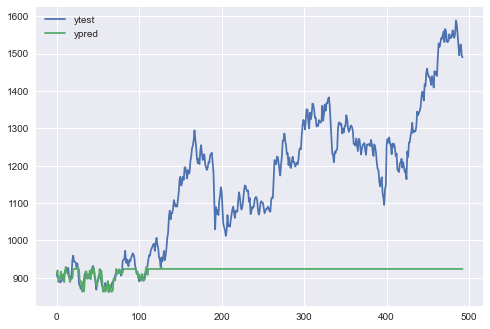

In [105]:
resdf.plot()

### The prediction was good in the beginning but over time it simply stoppped predicting and I have a fair Idea why??? Let's try something else